In [54]:
### Benjamin Tollison ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy.solvers.pde import pdsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate, Function, Eq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units:str):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
deg2rad = np.pi/180
rad2deg = 180/np.pi

In [55]:
# Problem 1
omega_E = 7.2921e-5
orbit_period = np.pi/(2*omega_E)
displayVariableWithUnits('TP',orbit_period,'s')
displayVariableWithUnits('TP',orbit_period/60,'hr')
displayVariableWithUnits('TP_4',4*orbit_period,'s')
displayVariableWithUnits('TP_4',4*orbit_period/60,'hr')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

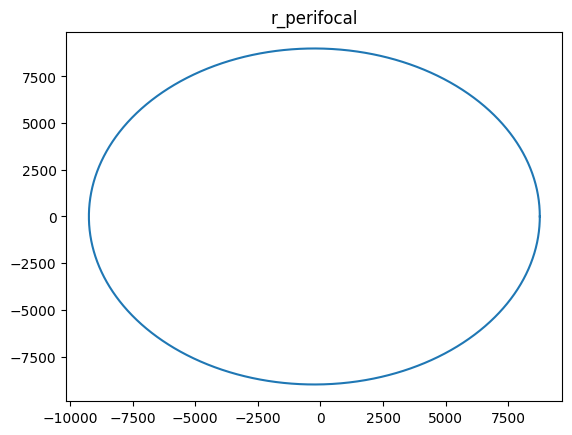

In [59]:
# Problem 2
import time
a = 9000 #km
e = 0.027
mu = 398600.44 #km^3/s^2
time_period = 2*np.pi*(a**3/mu)**0.5
time_period_converted = time.strftime('%H:%M:%S',time.gmtime(time_period))
displayVariable('TP',time_period_converted)
inclination = 30*deg2rad
right_ascension_node = 52*deg2rad
argument_of_periapsis = 0
Re = 6378 #km
def T3(radian:float):
  T = np.array([
    [np.cos(radian),np.sin(radian),0],
    [-np.sin(radian),np.cos(radian),0],
    [0,0,1]
  ])
  return T
def T1(radian:float):
  T = np.array([
    [1,0,0],
    [0,np.cos(radian),np.sin(radian)],
    [0,-np.sin(radian),np.cos(radian)],
  ])
  return T
Greenwich_angle =280.4606 # (280.4606+360.9856473*(8697+17/24))*deg2rad
exact_geo_angles = pd.read_csv('Sat1_LLA_Position.csv').to_dict()
true_anomoly = np.linspace(0,2*np.pi,len(exact_geo_angles['Lat (deg)'])) #len(exact_geo_angles['Lat (deg)']))
r_perifocal = np.zeros((len(true_anomoly),3))
for i,f in enumerate(true_anomoly):
  r_perifocal[i][0] = (a*(1-e**2))/(1+e*np.cos(f))*np.cos(f)
  r_perifocal[i][1] = (a*(1-e**2))/(1+e*np.cos(f))*np.sin(f)
  r_perifocal[i][2] = 0
dcm = T3(Greenwich_angle)@T3(right_ascension_node)@T1(inclination)
r_perifocal = r_perifocal.T
# plt.plot(r_perifocal[0],r_perifocal[1])
r_ECEF = dcm@r_perifocal
geocentric_angles = {'Lat':[],'Lon':[],'alt':[]}
for i in range(len(r_ECEF[0])):
  geocentric_angles['Lon'].append(np.arctan2(r_ECEF[1][i],r_ECEF[0][i])*rad2deg)
  geocentric_angles['Lat'].append(np.arcsin(r_ECEF[2][i]/np.linalg.norm(np.array([r_ECEF[0][i],r_ECEF[1][i],r_ECEF[2][i]])))*rad2deg)
  geocentric_angles['alt'].append(np.linalg.norm(np.array([r_ECEF[0][i],r_ECEF[1][i],r_ECEF[2][i]]))-Re)
geo_angles = pd.DataFrame.from_dict(geocentric_angles)
geo_angles.to_csv('Geocentric-Angles-python.csv')
# display(exact_geo_angles['Lat (deg)'].popitem())
# f0 = 0
# true_anomoly = np.linspace(0,2*np.pi,len(exact_geo_angles['Lat (deg)']))
# r_perifocal = np.array((a*(1-e**2))/(1+e*np.cos(f))*[np.cos(f),np.sin(f),0] for f in true_anomoly)
# r_perifocal = np.zeros((len(true_anomoly),3))
# for i,f in enumerate(true_anomoly):
  # r_perifocal[0][i] = (a*(1-e**2))/(1+e*np.cos(f))*np.cos(f)
  # r_perifocal[1][i] = (a*(1-e**2))/(1+e*np.cos(f))*np.sin(f)
  # r_perifocal[0][i] = 0
# print(r_perifocal)
# plt.plot(r_perifocal[0],r_perifocal[1])
# Greenwich_angle = (280.4606+360.9856473*(8697+17/24))*deg2rad
# r_ECEF = T3(Greenwich_angle)@T3(right_ascension_node)@T1(inclination)@r_perifocal
# geocentric_angles = {
  # 'Lat':np.array([np.arcsin(r[2]/np.linalg.norm(r))*rad2deg for r in r_ECEF]),
  # 'Lon':np.array([np.arctan2(r[1],r[0])*rad2deg for r in r_ECEF]),
  # 'h\'':np.array([np.linalg.norm(r)-Re for r in r_ECEF])
# }
# lambda_percent_error=[]
# phi_percent_error=[]
# for exact,approx in [exact_geo_angles['Lon (deg)'],exact_geo_angles['Lat (deg)']],[geo_angles['Lon'],geo_angles['Lat']]:
  # try:
    # lambda_percent_error.append(abs(exact[0]-approx[0])*100/abs(exact[0]))
    # phi_percent_error.append(abs(exact[1]-approx[1])*100/abs(exact[1]))
  # except:
    # lambda_percent_error.append(0),phi_percent_error.append(0)
# lambda_percent_error = (lambda_percent_error)
# phi_percent_error = (phi_percent_error)
# np.savetxt('r_perifocal.csv',r_perifocal,delimiter=',')
plt.plot(r_perifocal[0],r_perifocal[1])
plt.title('r_perifocal')
plt.show()

<IPython.core.display.Math object>

1.0
[99.93331405064919, 100.0] [98.92736793811008, 99.96282649417155]


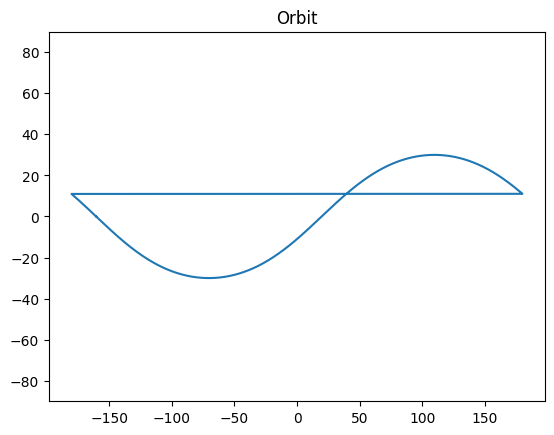

In [64]:
# Problem 2
import time
a = 9000 #km
e = 0.027
mu = 398600.44 #km^3/s^2
time_period = 2*np.pi*(a**3/mu)**0.5
time_period_converted = time.strftime('%H:%M:%S',time.gmtime(time_period))
displayVariable('TP',time_period_converted)
inclination = 30*deg2rad
right_ascension_node = 52*deg2rad
argument_of_periapsis = 0
Re = 6378 #km
def T3(radian:float):
  T = np.array([
    [np.cos(radian),np.sin(radian),0],
    [-np.sin(radian),np.cos(radian),0],
    [0,0,1]
  ])
  return T
def T1(radian:float):
  T = np.array([
    [1,0,0],
    [0,np.cos(radian),np.sin(radian)],
    [0,-np.sin(radian),np.cos(radian)],
  ])
  return T
exact_geo_angles = pd.read_csv('Sat1_LLA_Position.csv').to_dict()
f0 = 0
true_anomoly = np.linspace(0,2*np.pi,len(exact_geo_angles['Lat (deg)']))
r_perifocal = np.array([((a*(1-e)**2)/(1+e*np.cos(f)))*np.array([np.cos(f),np.sin(f),0]) for f in true_anomoly])
Greenwich_angle = (280.4606+360.9856473*(8697+17/24))*deg2rad
print(np.sin(Greenwich_angle)**2 + np.cos(Greenwich_angle)**2)
r_ECEF = np.array([T3(Greenwich_angle)@T3(right_ascension_node)@T1(inclination)@r for r in r_perifocal])
geocentric_angles = {
  'Lat':np.array([np.arcsin(r[2]/np.linalg.norm(r))*rad2deg for r in r_ECEF]),
  'Lon':np.array([np.arctan2(r[1],r[0])*rad2deg for r in r_ECEF]),
  'h\'':np.array([np.linalg.norm(r)-Re for r in r_ECEF])
}
geo_angles = pd.DataFrame.from_dict(geocentric_angles)
geo_angles.to_csv('Geocentric-Angles-python.csv')
lambda_percent_error=[]
phi_percent_error=[]
for exact,approx in [exact_geo_angles['Lon (deg)'],exact_geo_angles['Lat (deg)']],[geo_angles['Lon'],geo_angles['Lat']]:
  try:
    lambda_percent_error.append(abs(exact[0]-approx[0])*100/abs(exact[0]))
    phi_percent_error.append(abs(exact[1]-approx[1])*100/abs(exact[1]))
  except:
    lambda_percent_error.append(0),phi_percent_error.append(0)
lambda_percent_error = (lambda_percent_error)
phi_percent_error = (phi_percent_error)
print(lambda_percent_error,phi_percent_error)
plt.plot(geocentric_angles['Lon'],geocentric_angles['Lat'])
plt.ylim(bottom=-90,top=90)
plt.title('Orbit')
plt.show()